<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres. 

### A sample dataset might look like :





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


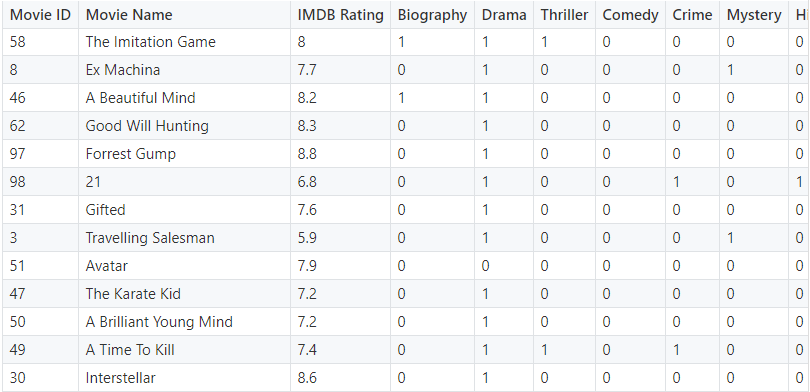

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [ ]:
import pandas as pd
path='/content/drive/MyDrive/AlmaBetter/Module 3/Week 3/Day 1/'
imdb_df=pd.read_csv(path+'imdb_data.csv')

In [ ]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
imdb_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
imdb_df.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

Selectinf 1100 movies from the data set , so that we can clean and remove few

In [ ]:
df=imdb_df[['id','genres','popularity','title']].sample(n = 1100, replace = False)

In [ ]:
df.head()

,id,genres,popularity,title
965,966,"[{'id': 35, 'name': 'Comedy'}]",9.304901,Vegas Vacation
1717,1718,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",10.246549,RoboCop
481,482,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1.970481,Chandni Chowk To China
1729,1730,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1.891138,Dil Se..
1147,1148,"[{'id': 18, 'name': 'Drama'}]",7.781790,American Honey


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['genres'] = df.apply(lambda row: eval(row['genres']), axis=1)

In [ ]:
df.index=range(len(df))

In [ ]:
df.head()

,id,genres,popularity,title
0,966,"[{'id': 35, 'name': 'Comedy'}]",9.304901,Vegas Vacation
1,1718,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",10.246549,RoboCop
2,482,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1.970481,Chandni Chowk To China
3,1730,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1.891138,Dil Se..
4,1148,"[{'id': 18, 'name': 'Drama'}]",7.781790,American Honey


In [ ]:
df['genres'][1]

[{'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
import numpy as np

genres_list = []
for index, row in df.iterrows():
    innerlist=[]
    genre_list = df.loc[index, 'genres']
    for elem in genre_list:
        innerlist.append(elem['name'])
    genres_list.append(innerlist)

genres_list=np.array([np.array(xi) for xi in genres_list])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
genres_list[0:5]

array([array(['Comedy'], dtype='<U6'),
       array(['Action', 'Science Fiction'], dtype='<U15'),
       array(['Action', 'Adventure', 'Comedy', 'Drama'], dtype='<U9'),
       array(['Drama', 'Romance'], dtype='<U7'),
       array(['Drama'], dtype='<U5')], dtype=object)

In [ ]:
df['genres_list']=genres_list

In [ ]:
df.head()

,id,genres,popularity,title,genres_list
0,966,"[{'id': 35, 'name': 'Comedy'}]",9.304901,Vegas Vacation,[Comedy]
1,1718,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",10.246549,RoboCop,"[Action, Science Fiction]"
2,482,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1.970481,Chandni Chowk To China,"[Action, Adventure, Comedy, Drama]"
3,1730,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1.891138,Dil Se..,"[Drama, Romance]"
4,1148,"[{'id': 18, 'name': 'Drama'}]",7.781790,American Honey,[Drama]


In [ ]:
df.drop('genres',axis=1,inplace=True)

In [ ]:
df.head()

,id,popularity,title,genres_list
0,966,9.304901,Vegas Vacation,[Comedy]
1,1718,10.246549,RoboCop,"[Action, Science Fiction]"
2,482,1.970481,Chandni Chowk To China,"[Action, Adventure, Comedy, Drama]"
3,1730,1.891138,Dil Se..,"[Drama, Romance]"
4,1148,7.781790,American Honey,[Drama]


In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('genres_list')),
                index=df.index,
                columns=mlb.classes_))

In [ ]:
column_sum= df.drop(['id','popularity'],axis=1).sum(numeric_only=True, axis=0)

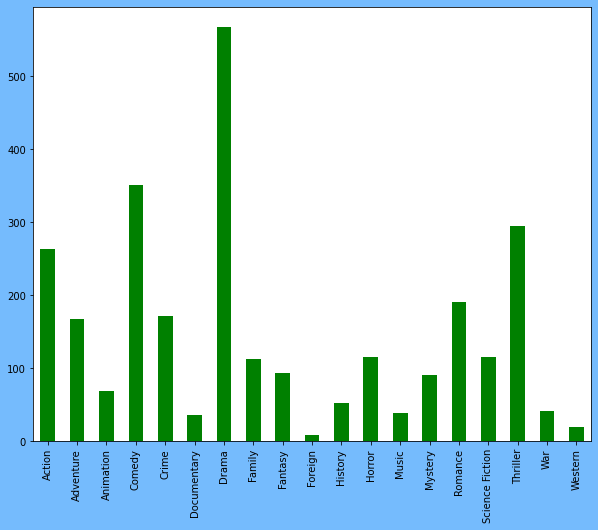

In [ ]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8),edgecolor='k',facecolor='xkcd:sky blue')
column_sum.plot(kind='bar',color='green')
plt.show()

Just checking for the correlation among diffrent genres

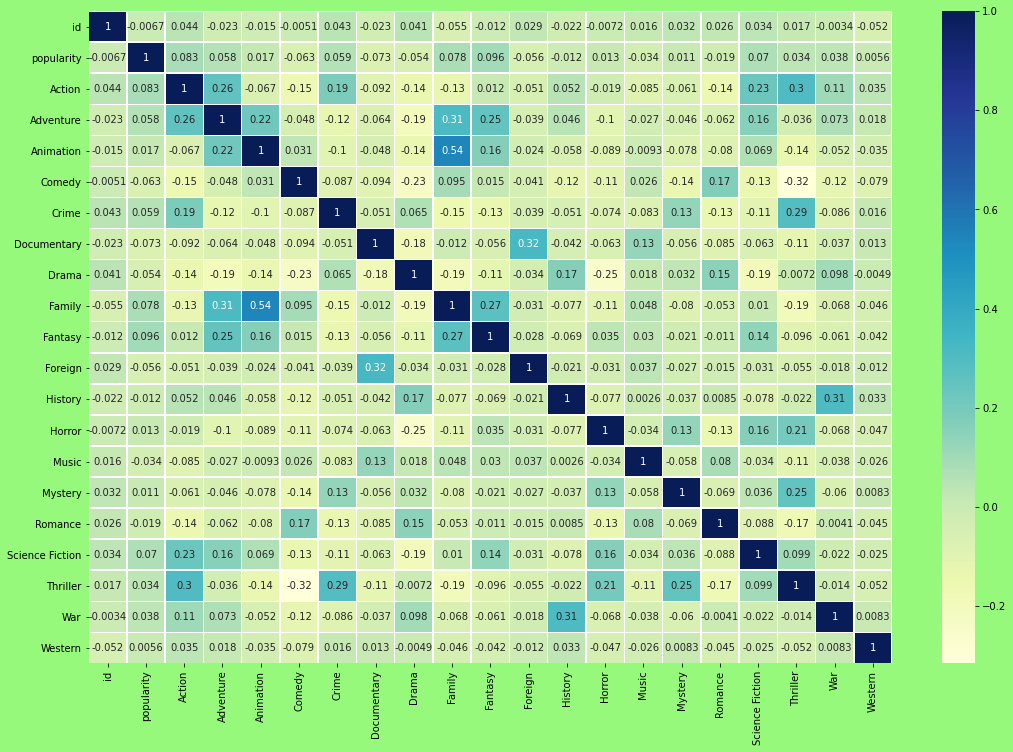

In [ ]:
plt.figure(figsize=(18,12),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

HArd To draw any conclusion from it

In [ ]:
X=df.set_index('title')
X.drop(columns='id',inplace=True)
X

,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Vegas Vacation,9.304901,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RoboCop,10.246549,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Chandni Chowk To China,1.970481,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Dil Se..,1.891138,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
American Honey,7.781790,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gun Shy,6.370105,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Alice in Wonderland,17.285093,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Rock Star,10.076223,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:

from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(X.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)



NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:

query_index = np.random.choice(X.shape[0])
print(query_index)


794


In [ ]:
distances, indices = model_knn.kneighbors(np.array(X.iloc[query_index,:].values).reshape(1, -1), n_neighbors = 6)


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Where the Wild Things Are:

1: Harry Potter and the Half-Blood Prince, with distance of 0.002158726524531307:
2: Alice in Wonderland, with distance of 0.002177934109495072:
3: Harry Potter and the Chamber of Secrets, with distance of 0.0027651583022806348:
4: Pan, with distance of 0.0038858419086668095:
5: Maleficent, with distance of 0.004766999300220842:


In [ ]:
X_test=df[1001:1010].set_index('title')
X_test.drop(columns='id',inplace=True)

In [ ]:

test_movie=X_test.index.tolist()

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

Recommendations for It Doesn't Hurt Me:


1: Dil Se.., with distance of 0.2412659322433791:
2: RoboCop, with distance of 0.2873273360315354:
3: My Old Classmate, with distance of 0.29529092856794636:
4: Chandni Chowk To China, with distance of 0.2969500127590402:
5: I Love You, Man, with distance of 0.3410460558156734:

Recommendations for The Rapture:


1: Chandni Chowk To China, with distance of 0.005518257905236412:
2: I Love You, Man, with distance of 0.014160690040906587:
3: Welcome Mr. President!, with distance of 0.026602889779505645:
4: My Old Classmate, with distance of 0.08268332055679606:
5: Dil Se.., with distance of 0.10191031280572038:

Recommendations for Murder on the Orient Express:


1: RoboCop, with distance of 0.005518257905236412:
2: I Love You, Man, with distance of 0.015938196703527807:
3: Welcome Mr. President!, with distance of 0.028357962671521908:
4: My Old Classmate, with distance of 0.06686813781366441:
5: Dil Se.., with distance of 0.10901640817877034:

Re

This is how we are able to genrate recomendations using knn

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'minkowski', algorithm = 'auto')
model_knn.fit(movie_features_df_matrix)



NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

Recommendations for It Doesn't Hurt Me:


1: American Honey, with distance of 1.5081209357462018:
2: Pagafantas, with distance of 1.7399138748754204:
3: Dil Se.., with distance of 1.8832030982411325:
4: My Old Classmate, with distance of 3.0600176105741617:
5: Welcome Mr. President!, with distance of 5.282718659384485:

Recommendations for The Rapture:


1: Chandni Chowk To China, with distance of 1.6172828114142523:
2: Welcome Mr. President!, with distance of 2.714391324376239:
3: My Old Classmate, with distance of 4.970139822466164:
4: Dil Se.., with distance of 6.005970199645099:
5: Vegas Vacation, with distance of 7.2205087103056655:

Recommendations for Murder on the Orient Express:


1: RoboCop, with distance of 1.6172828114142523:
2: Welcome Mr. President!, with distance of 3.9110691840519776:
3: My Old Classmate, with distance of 6.118034855371127:
4: Dil Se.., with distance of 7.316141357934591:
5: Vegas Vacation, with distance of 8.529436896546924:

Recommendations for Jackso